In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

## Generating Polynomial Data

In [79]:
def generate_polynomial_data(n, deg=2, l=None, h=None, m=None, c=None, s=1, seed=None):
    l, h = -deg, deg
    m = m if m else np.random.RandomState(seed).randn(3)
    c = c if c else np.random.RandomState(seed).randint(l, h, 1)
    x = np.random.uniform(l, h, n)
    x2 = x ** 2
    sinx = np.sin(x) * 5
    cosx = np.cos(x) * 5
    X = np.c_[x2, sinx, cosx]
    y = m @ X.T + c
    noise = s * np.random.randn(n) + (y.max() - y.min())
    y = y + noise
    return x, y

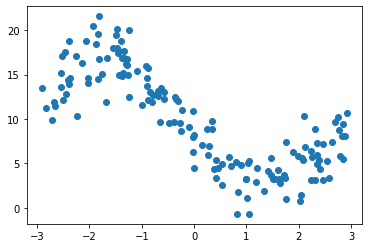

In [92]:
x, y = generate_polynomial_data(150, deg=3, s=2)
plt.scatter(x, y)

In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [94]:
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

x_train shape :  (120,)
x_test shape :  (30,)
y_train shape :  (120,)
y_test shape :  (30,)


## Simple Polynomial Regression Model

In [157]:
class SimplePolynomialRegressor:
    def __init__(self, degree=2, weights=None, bias=None, normalize=True):
        self.__degree = degree
        self.weights = weights if weights else np.random.randn(degree)
        self.bias = bias if bias else np.random.randn(1)
        self.__normalize = normalize
        self.__scaling_params = (0, 1)
        self.loss_per_epochs = []
    
    def __transform(self, x, training=False):
        X = x
        for i in range(2, self.__degree + 1):
            X = np.c_[X, x ** i]
        if training:
            self.__scaling_params = (X.mean(axis=0), X.std(axis=0))
        if self.__normalize:
            mu, s = self.__scaling_params
            X = (X - mu) / (s + 1e-9)
        return X.T
    
    def fit(self, x, y, epochs=1, batch_size=None, alpha=0.001, verbose=True):
        X = self.__transform(x, training=True)
        losses = []
        for i in range(epochs):
            y_pred = self.weights.T @ X + self.bias
            J = 0.5 * np.mean(np.square(y - y_pred))
            self.weights -= alpha * np.mean((y_pred - y) * X, axis=1)
            self.bias -= alpha * np.mean(y_pred - y)
            losses.append(J)
            if verbose:
                print(f'Epoch {i+1}/{epochs}\n{x.shape[0]}/{x.shape[0]} [==============] : loss - {J}')
        self.loss_per_epochs = losses
    
    def predict(self, x):
        x = self.__transform(x)
        return self.weights.T @ x + self.bias
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        J = 0.5 * np.mean(np.square(y - y_pred))
        return J
    
    def plot_fit_line(self, x, y):
        y_pred = self.predict(x)
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, c='c', ec='k')
        o = x.argsort()
        plt.plot(x[o], y_pred[o], 'r', lw=3, label='y_pred')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Model Prediction Line')
        plt.legend(loc='best')
        
    def get_weights(self, return_scaling_params=False):
        "returns weights as a dict object with keys - `weights` and `bias`"
        model_weights = {'weights' : self.weights, 'bias' : self.bias}
        if return_scaling_params:
            model_weights['scaling_mean'], model_weights['scaling_std'] = self.__scaling_params
        return model_weights

## Training

In [158]:
model = SimplePolynomialRegressor()

In [159]:
model.fit(x_train, y_train, epochs=50, alpha=0.3)

Epoch 1/50
120/120 [==============] : loss - 54.98919796427326
Epoch 2/50
120/120 [==============] : loss - 29.806143711603863
Epoch 3/50
120/120 [==============] : loss - 17.456094013549816
Epoch 4/50
120/120 [==============] : loss - 11.381034843279293
Epoch 5/50
120/120 [==============] : loss - 8.383580431591945
Epoch 6/50
120/120 [==============] : loss - 6.900107309773339
Epoch 7/50
120/120 [==============] : loss - 6.163659298883072
Epoch 8/50
120/120 [==============] : loss - 5.796922051945504
Epoch 9/50
120/120 [==============] : loss - 5.6137168693889965
Epoch 10/50
120/120 [==============] : loss - 5.521902064446254
Epoch 11/50
120/120 [==============] : loss - 5.475737966589821
Epoch 12/50
120/120 [==============] : loss - 5.452449657894045
Epoch 13/50
120/120 [==============] : loss - 5.4406617058998075
Epoch 14/50
120/120 [==============] : loss - 5.434674437641351
Epoch 15/50
120/120 [==============] : loss - 5.43162282662606
Epoch 16/50
120/120 [==============] : loss -

Text(0.5, 1.0, 'Training Loss')

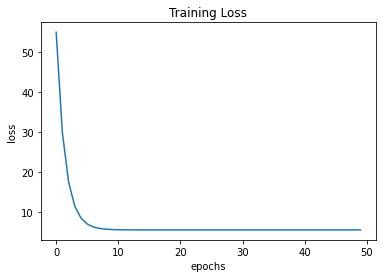

In [160]:
plt.plot(model.loss_per_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')

In [161]:
min(model.loss_per_epochs)

5.428403041321747

## Predictions

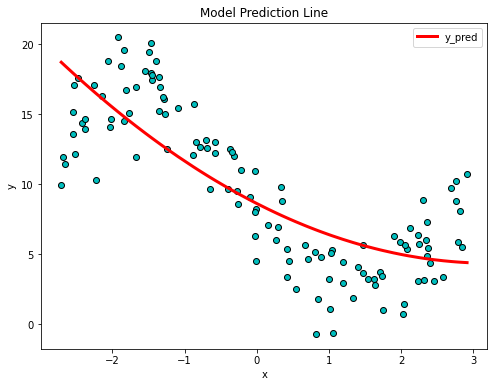

In [162]:
model.plot_fit_line(x_train, y_train)

In [163]:
indices = np.random.permutation(np.arange(x_train.shape[0]))[:100]
y_pred = model.predict(x_train[indices])
y_true = y_train[indices]

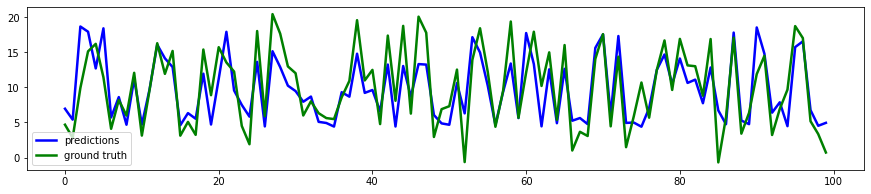

In [164]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_true, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')

## Improving Model Performance

In [165]:
model = SimplePolynomialRegressor(degree=3)

In [166]:
model.fit(x_train, y_train, epochs=500, alpha=0.1)

Epoch 1/500
120/120 [==============] : loss - 59.739384718162015
Epoch 2/500
120/120 [==============] : loss - 48.80160532486937
Epoch 3/500
120/120 [==============] : loss - 40.2479278491446
Epoch 4/500
120/120 [==============] : loss - 33.51161153755756
Epoch 5/500
120/120 [==============] : loss - 28.174216314192453
Epoch 6/500
120/120 [==============] : loss - 23.922949854390804
Epoch 7/500
120/120 [==============] : loss - 20.52127644212111
Epoch 8/500
120/120 [==============] : loss - 17.788430299158506
Epoch 9/500
120/120 [==============] : loss - 15.584958624305001
Epoch 10/500
120/120 [==============] : loss - 13.802387218349498
Epoch 11/500
120/120 [==============] : loss - 12.355735217380861
Epoch 12/500
120/120 [==============] : loss - 11.1780220596619
Epoch 13/500
120/120 [==============] : loss - 10.216185040687122
Epoch 14/500
120/120 [==============] : loss - 9.428008694100988
Epoch 15/500
120/120 [==============] : loss - 8.779789587851473
Epoch 16/500
120/120 [======

Text(0.5, 1.0, 'Training Loss')

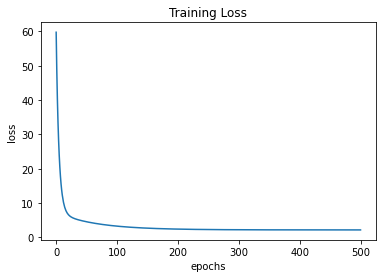

In [167]:
plt.plot(model.loss_per_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')

In [168]:
min(model.loss_per_epochs)

2.1838586353083844

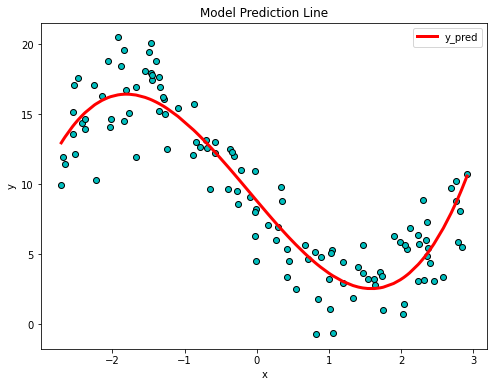

In [169]:
model.plot_fit_line(x_train, y_train)

In [170]:
indices = np.random.permutation(np.arange(x_train.shape[0]))[:100]
y_pred = model.predict(x_train[indices])
y_true = y_train[indices]

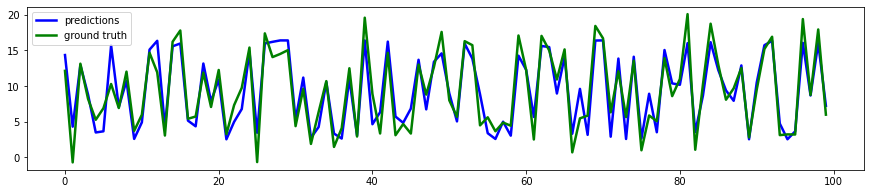

In [171]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_true, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')

In [172]:
model.get_weights()

{'weights': array([-10.36024741,   0.57127044,   6.48625795]),
 'bias': array([9.58737357])}

## Evaluation

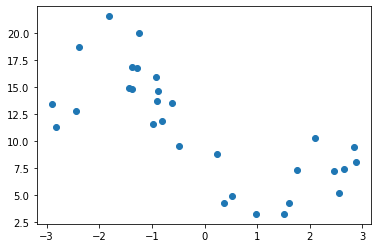

In [173]:
plt.scatter(x_test, y_test);

In [174]:
model.evaluate(x_test, y_test)

3.0583400759693236

In [175]:
y_pred = model.predict(x_test)

In [176]:
test_loss = 0.5 * np.mean((y_pred - y_test) ** 2)
print('test loss : ', test_loss)

test loss :  3.0583400759693236


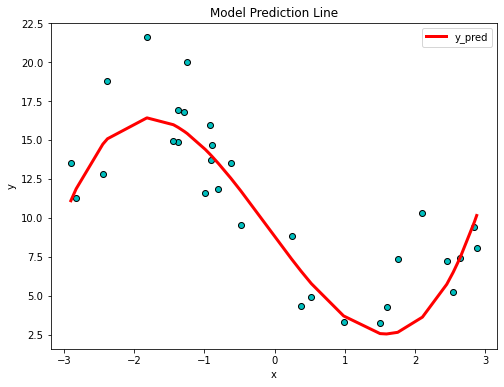

In [177]:
model.plot_fit_line(x_test, y_test)

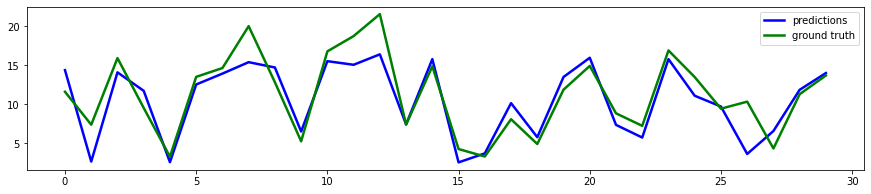

In [178]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_test, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')